In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
data=pd.read_csv("Failure prediction - For model creation.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
Random            700 non-null float64
Machine nbr       700 non-null int64
lifetime          700 non-null int64
broken            700 non-null object
pressureInd       700 non-null float64
moistureInd       700 non-null float64
temperatureInd    700 non-null float64
team              700 non-null int64
provider          700 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 49.3+ KB


In [3]:
data.describe()

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.500803,506.242857,54.910000,98.506610,99.683866,100.834717,2.000000,2.462857
std,0.293198,288.266857,26.691994,20.219140,10.054357,19.885707,0.804138,1.101458
min,0.000989,2.000000,1.000000,33.481917,58.547301,42.279598,1.000000,1.000000
25%,0.245743,256.750000,32.750000,85.694034,92.807344,87.224880,1.000000,1.000000
50%,0.492816,508.500000,60.000000,96.650895,99.843030,100.789181,2.000000,2.000000
75%,0.748046,753.250000,80.000000,112.005435,106.304672,113.829355,3.000000,3.000000
max,0.996737,999.000000,93.000000,173.282541,128.595038,172.544140,3.000000,4.000000


In [4]:
data.var()

Random                0.085965
Machine nbr       83097.780707
lifetime            712.462561
pressureInd         408.813616
moistureInd         101.090103
temperatureInd      395.441357
team                  0.646638
provider              1.213211
dtype: float64

In [5]:
data.head()

,Random,Machine nbr,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,0.437420,723,60,Yes,77.836105,112.832544,121.786371,3,3
1,0.688345,107,88,Yes,89.350620,95.228125,99.082317,1,4
2,0.805670,153,30,No,130.089477,96.367747,103.608344,1,3
3,0.923187,140,79,Yes,87.421990,110.941574,129.691510,2,1
4,0.036583,359,2,No,69.939898,86.292387,91.861983,3,3


In [6]:
data.corr()

,Random,Machine nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
Random,1.000000,-0.020749,-0.000074,-0.001724,0.032678,-0.034965,0.023509,-0.018732
Machine nbr,-0.020749,1.000000,-0.071474,0.026465,0.003802,-0.042805,0.011436,-0.001211
lifetime,-0.000074,-0.071474,1.000000,0.008938,0.003450,0.007413,-0.052655,-0.024030
pressureInd,-0.001724,0.026465,0.008938,1.000000,0.024454,0.001514,-0.035732,-0.023515
moistureInd,0.032678,0.003802,0.003450,0.024454,1.000000,0.001229,-0.004429,0.038827
temperatureInd,-0.034965,-0.042805,0.007413,0.001514,0.001229,1.000000,0.006878,-0.020195
team,0.023509,0.011436,-0.052655,-0.035732,-0.004429,0.006878,1.000000,0.004846
provider,-0.018732,-0.001211,-0.024030,-0.023515,0.038827,-0.020195,0.004846,1.000000


In [7]:
data[(data.broken=='Yes') & (data.lifetime<60)][['lifetime','temperatureInd','pressureInd','moistureInd']].head(10)

,lifetime,temperatureInd,pressureInd,moistureInd


In [8]:
data[(data['broken']=='No') & (data['lifetime'] >= 60)][['lifetime','temperatureInd','pressureInd','moistureInd']].head(10)

,lifetime,temperatureInd,pressureInd,moistureInd
7,62,107.696747,94.415823,95.073117
12,77,95.606125,113.090878,109.369809
19,61,83.129192,137.107419,89.753473
25,72,92.929963,105.003465,113.907966
34,63,110.701909,90.162560,91.435216
40,68,109.636018,118.007053,84.596410
62,72,81.185397,49.605386,94.565654
63,80,86.396180,86.430680,104.693943
66,83,106.187552,100.284861,102.433622
67,62,98.907345,105.635963,92.741720


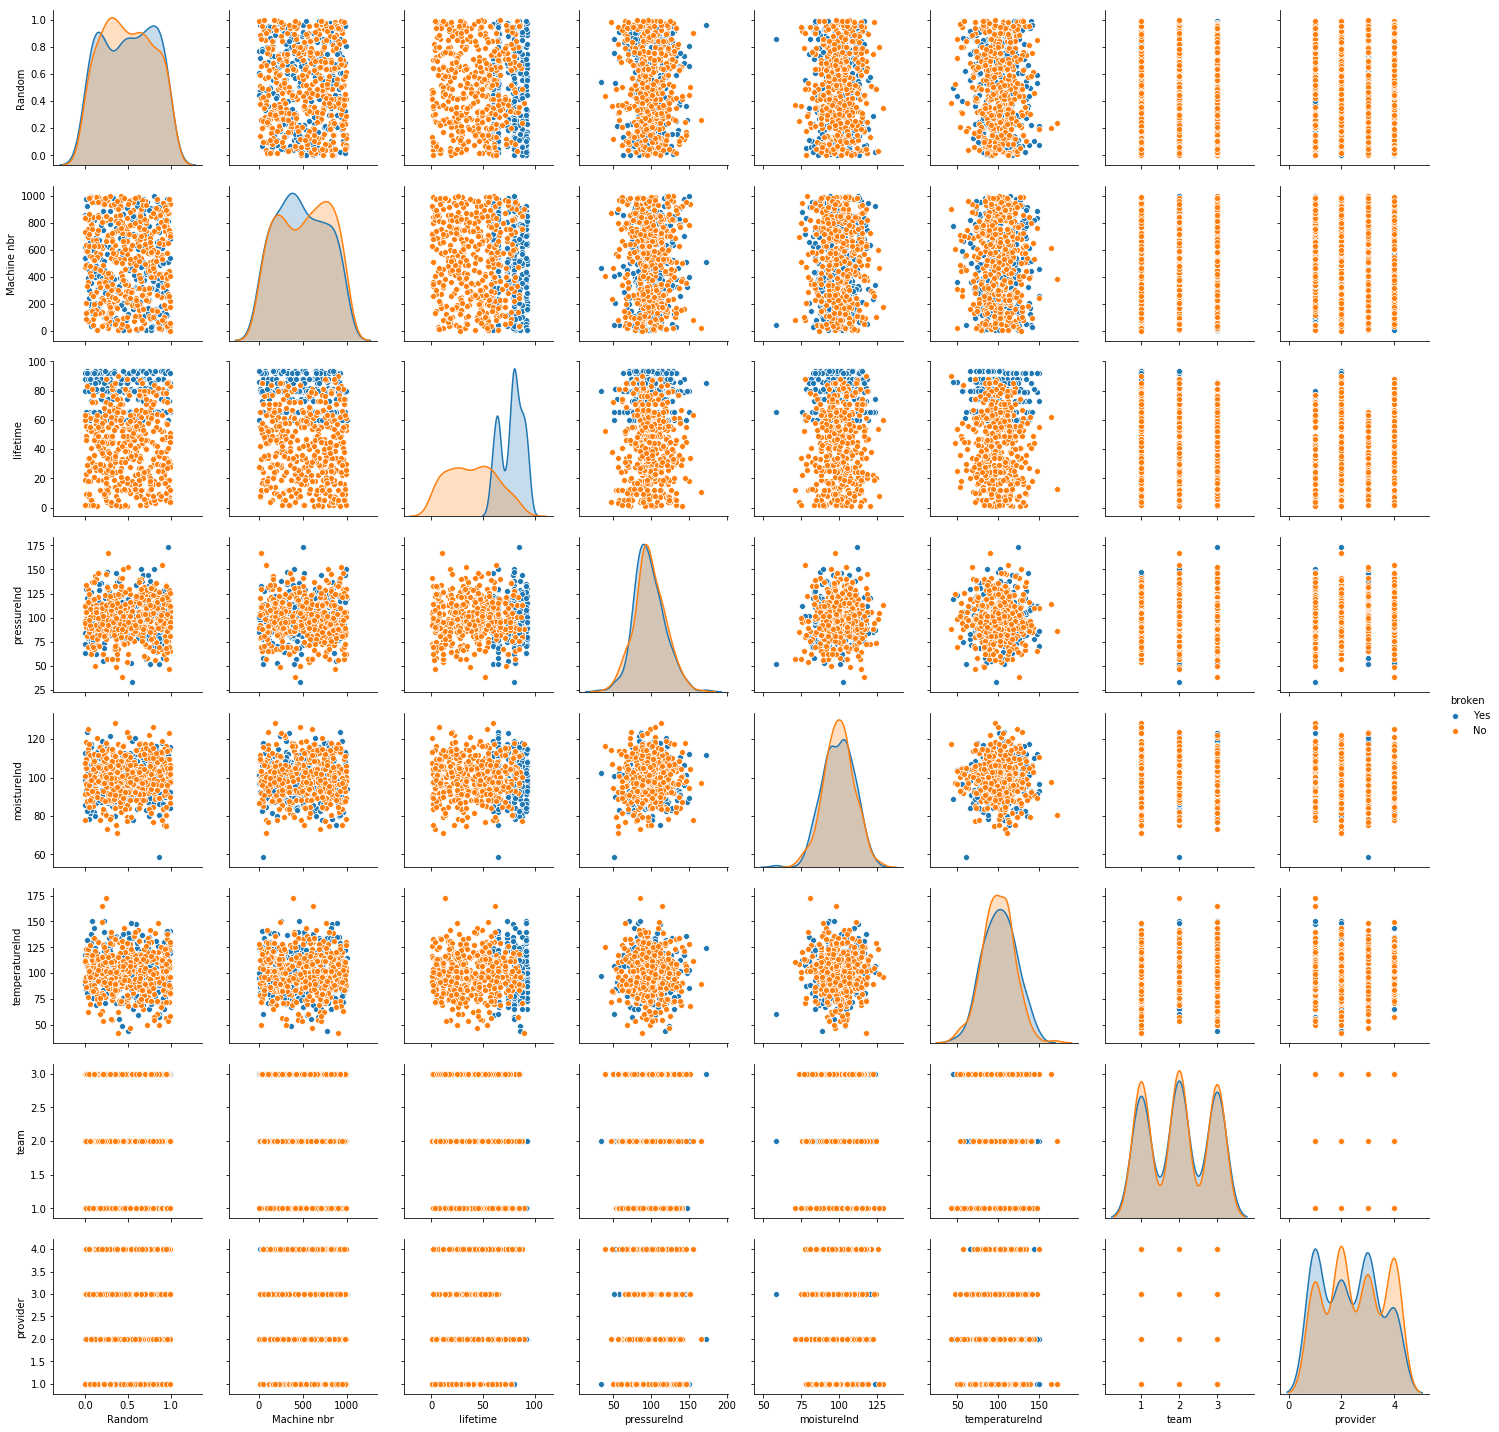

In [9]:
import seaborn as sns
sns.pairplot(data,hue='broken')

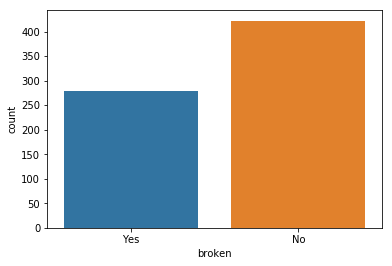

In [10]:
sns.countplot(x='broken',data=data)

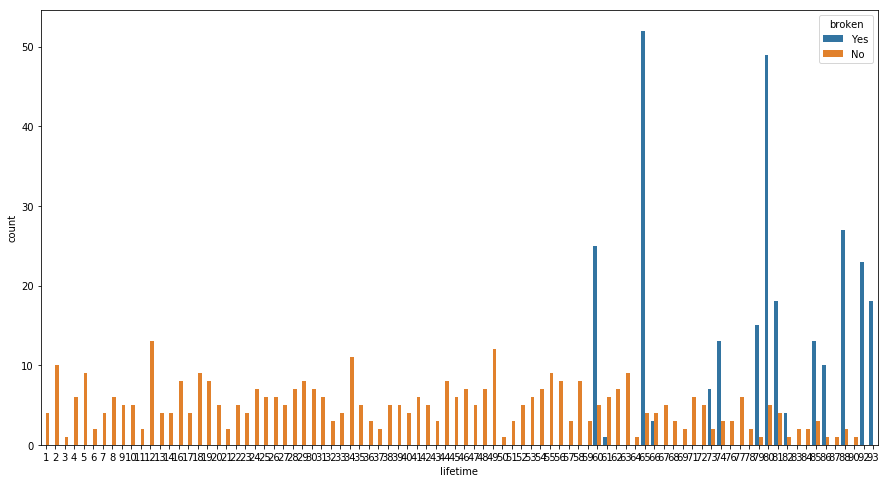

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,8))
sns.countplot(x='lifetime',data=data,hue='broken')

In [12]:
data['broken'].value_counts()

No     422
Yes    278
Name: broken, dtype: int64

In [13]:
feature_names=['Random','Machine nbr','lifetime','temperatureInd','moistureInd','pressureInd','team','provider']
X=data[feature_names]
y=data.broken

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [15]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

/home/ksolves/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ksolves/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ksolves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is {} ".format(accuracy))


accuracy is 0.9 


In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score
cross=cross_val_score(tree,X_train,y_train,cv=5)
print(cross)
print(np.mean(cross))

[0.92929293 0.8989899  0.95918367 0.94845361 0.93814433]
0.9348128879793093


In [18]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(X_train,y_train)
y_pred=gn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is {}".format(accuracy))

accuracy is 0.819047619047619


[[105  24]
 [ 14  67]]


Text(0.5, 257.44, 'Predicted label')

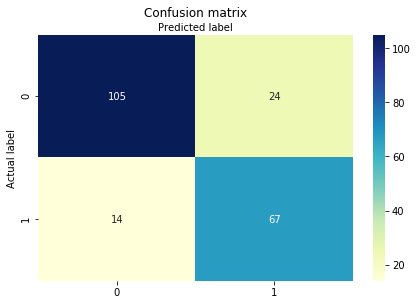

In [19]:
cnf_matrix =confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')